In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Text Classification**

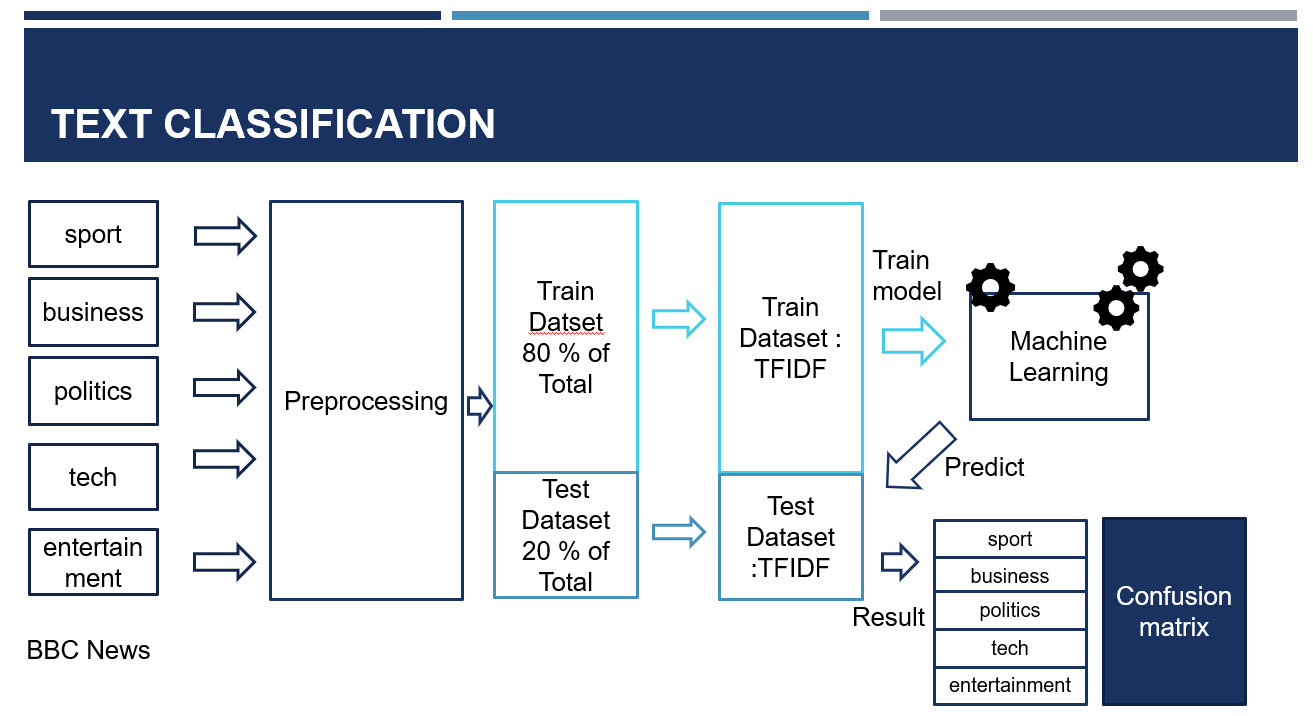

# Dataset
ข่าวจาก BBC ซึ่งประกอบด้วยเอกสาร 2225 เอกสารในปี 2004-2005 ซึ่งมีข่าวทั้งหมด 5 ประเภทคือ 


*   ข่าวธุรกิจ(business)
*   ข่าวบันเทิง(entertainment)
* ข่าวการเมือง(politics)
* ข่าวกีฬา(sport)
* ข่าวเทคโนโลยี(tech) 

โดย Download จาก
http://mlg.ucd.ie/datasets/bbc.html

In [2]:
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', None)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


**NLTK** เป็น python library ที่ใช้ใด้าน NLP สำหรับภาษาอังกฤษ

NLTK document :https://www.nltk.org/

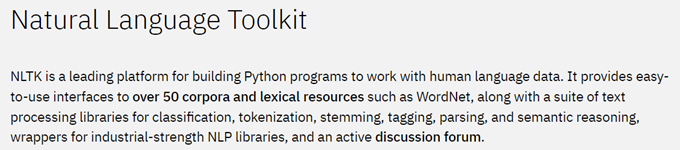

In [3]:
# ใช้ function read_pickle() ในการอ่าน dataframe
df=pd.read_csv('/content/drive/MyDrive/NLP/Day1/Text_classification/bbc_news.csv', index_col=0)
df.head()

,Category,Text
0,sport,Bristol City 2-1 Milton Keynes\n\nLeroy Lita t...
1,sport,Parry puts Gerrard 'above money'\n\nListen to ...
2,sport,O'Sullivan keeps his powder dry\n\nWhen you ar...
3,sport,Brizzel to run AAA's in Sheffield\n\nBallymena...
4,sport,Rush future at Chester uncertain\n\nIan Rush's...


**Parameter**



*   Category : ประเภทของข่าว
*   Text : เนื้อหาของข่าว



In [4]:
df['Category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: Category, dtype: int64

จากเอกสาร 2225 เอกสารแบ่งออกเป็น 

*   ข่าวธุรกิจ(business)จำนวน 510 เอกสาร
*   ข่าวบันเทิง(entertainment)จำนวน 386 เอกสาร
*   ข่าวการเมือง(politics)จำนวน 417 เอกสาร 
*   ข่าวกีฬา(sport)จำนวน 511 เอกสาร
*   ข่าวเทคโนโลยี (tech)จำนวน 401 เอกสาร

และซึ่งใช้function value_counts() แยก Category ออกมาจาก dataframe

จำนวนเอกสารของแต่ละประเภทของข่าวในรูปของ bar chart

<AxesSubplot:>

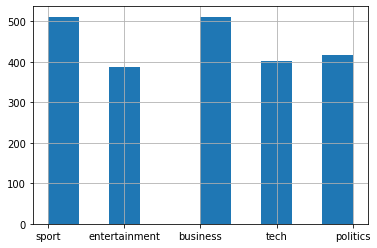

In [5]:
df['Category'].hist()

## Preprocessing Text

In [6]:
import string
import re

In [7]:
# อักขระพิเศษ
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
df['Text'][8]

'Disappointed Scott in solid start\n\nAllan Scott is confident of winning a medal at next week\'s European Indoor Championships after a solid debut on the international circuit.\n\nThe 22-year-old Scot finished fourth in the 60m hurdles at the Jose M Cagigal Memorial meeting in Madrid. "It was definitely a learning curve and I certainly haven\'t ruled out challenging for a medal next week," said the East Kilbride athlete. The race was won by Felipe Vivancos, who equalled the Spanish record.\n\nSweden\'s Robert Kronberg was second, with Haiti\'s Dudley Dorival in third. Scott was slightly disappointed with his run in the final. He won his heat in 7.64secs but ran 0.04secs slower in his first IAAF Indoor Grand Prix circuit final. "I should have done better than that," he said. "I felt I could have won it. I got a poor start - but I still felt I should have ran faster." Vivancos slashed his personal best to equal the Spanish record with a time of 7.60secs while Kronberg and Dorival clocke

In [9]:
r'[{}]'.format(string.punctuation)

'[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]'

**การทำความสะอาดข้อความหรือ preprocessing**

*   แปลงตัวอักษรจากตัวพิมพ์ใหญ่เป็นตัวพิมพ์เล็ก
*   ลบ \n ออกจากข้อความ
*   ลบ punctuation ออกจากข้อความ


In [10]:
def Preprocess_cleansing(text):
      ''' Converting  text to lower case
      and  removing all punctuation'''
      # แปลงตัวอักษรตัวใหญ่ให้เป็นตัวเล็กทั้งหมด
      text=text.lower()
      # ลบ punctuation ทั้งหมด
      text = re.sub('\n', ' ', text)
      text = re.sub(r'[{}]'.format(string.punctuation), ' ', text)
      return text


In [11]:
 Preprocess_cleansing(df['Text'][8])

'disappointed scott in solid start  allan scott is confident of winning a medal at next week s european indoor championships after a solid debut on the international circuit   the 22 year old scot finished fourth in the 60m hurdles at the jose m cagigal memorial meeting in madrid   it was definitely a learning curve and i certainly haven t ruled out challenging for a medal next week   said the east kilbride athlete  the race was won by felipe vivancos  who equalled the spanish record   sweden s robert kronberg was second  with haiti s dudley dorival in third  scott was slightly disappointed with his run in the final  he won his heat in 7 64secs but ran 0 04secs slower in his first iaaf indoor grand prix circuit final   i should have done better than that   he said   i felt i could have won it  i got a poor start   but i still felt i should have ran faster   vivancos slashed his personal best to equal the spanish record with a time of 7 60secs while kronberg and dorival clocked 7 62secs

การทำความสะอาดข้อความโดยใช้ apply() ซึ่งจะเป็นการทำความสะอาดโดยใช้ function Preprocess_cleansing ทุกข้อความ

In [12]:
df['Text_cleansing']=df['Text'].apply(lambda x: Preprocess_cleansing(x))

### Tokenization

กระบวนการตัดคำจากประโยคให้เป็นคำซึ่งใช้ function nltk.tokenize.word_tokenize() 

In [13]:
from nltk.tokenize import  word_tokenize
df['Text_token']=df['Text_cleansing'].apply(lambda x: word_tokenize(x))

In [14]:
df['Text_cleansing'][0]

'bristol city 2 1 milton keynes  leroy lita took his goal tally to 13 for the season as his double earned city an ldv vans trophy win   the striker finished off scott murray cross from close range just seconds before half time  lita then made it 2 0 on 52 minutes  but dons  substitute serge makofo then netted a great volley to make it 2 1  the visitors almost took the tie to extra time with a late 30 yard bullet from richard johnson which was well held by steve phillips   phillips  amankwaah  coles  hill  fortune  murray  anyinsah 59   doherty  harley 45   dinning  bell  lita  cotterill 72   gillespie  subs not used  orr  brown   hill   lita 45  52   bevan  oyedele  ntimban zeh  crooks  puncheon  kamara  makofo 64   chorley  herve  mckoy 45   tapp  johnson 45   mackie  pacquette  subs not used  martin  palmer   pacquette  chorley  johnson  mckoy   makofo 66   3 367  j ross  essex   '

In [15]:
df['Text_token'][0][:10]

['bristol',
 'city',
 '2',
 '1',
 'milton',
 'keynes',
 'leroy',
 'lita',
 'took',
 'his']

### Stemming

การแปลง suffix ของคำซึ่งในที่นี้มี 2 วิธีให้เลือกคือ 


*   SnowballStemmer()
*   PorterStemmer()



In [16]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer
def Steming_text(text_tokenize,steming_type='porter'):
    ''' steming word follow grammatically
        return list '''
    if 'porter':
      stemmer = PorterStemmer()
    elif 'snowball':
      stemmer = SnowballStemmer("english")
    text=[stemmer.stem(word) for word in text_tokenize]
    text=' '.join(text)
    return text

การแปลง suffix ของคำโดยใช้ function Steming_text()

In [17]:
df['Text_stem']=df['Text_token'].apply(lambda x: Steming_text(x))

In [19]:
df['Text_cleansing'][0]

'bristol city 2 1 milton keynes  leroy lita took his goal tally to 13 for the season as his double earned city an ldv vans trophy win   the striker finished off scott murray cross from close range just seconds before half time  lita then made it 2 0 on 52 minutes  but dons  substitute serge makofo then netted a great volley to make it 2 1  the visitors almost took the tie to extra time with a late 30 yard bullet from richard johnson which was well held by steve phillips   phillips  amankwaah  coles  hill  fortune  murray  anyinsah 59   doherty  harley 45   dinning  bell  lita  cotterill 72   gillespie  subs not used  orr  brown   hill   lita 45  52   bevan  oyedele  ntimban zeh  crooks  puncheon  kamara  makofo 64   chorley  herve  mckoy 45   tapp  johnson 45   mackie  pacquette  subs not used  martin  palmer   pacquette  chorley  johnson  mckoy   makofo 66   3 367  j ross  essex   '

In [20]:
Steming_text(df['Text_token'][0],steming_type='porter')

'bristol citi 2 1 milton keyn leroy lita took hi goal talli to 13 for the season as hi doubl earn citi an ldv van trophi win the striker finish off scott murray cross from close rang just second befor half time lita then made it 2 0 on 52 minut but don substitut serg makofo then net a great volley to make it 2 1 the visitor almost took the tie to extra time with a late 30 yard bullet from richard johnson which wa well held by steve phillip phillip amankwaah cole hill fortun murray anyinsah 59 doherti harley 45 din bell lita cotteril 72 gillespi sub not use orr brown hill lita 45 52 bevan oyedel ntimban zeh crook puncheon kamara makofo 64 chorley herv mckoy 45 tapp johnson 45 macki pacquett sub not use martin palmer pacquett chorley johnson mckoy makofo 66 3 367 j ross essex'

In [21]:
Steming_text(df['Text_token'][0],steming_type='snowball')

'bristol citi 2 1 milton keyn leroy lita took hi goal talli to 13 for the season as hi doubl earn citi an ldv van trophi win the striker finish off scott murray cross from close rang just second befor half time lita then made it 2 0 on 52 minut but don substitut serg makofo then net a great volley to make it 2 1 the visitor almost took the tie to extra time with a late 30 yard bullet from richard johnson which wa well held by steve phillip phillip amankwaah cole hill fortun murray anyinsah 59 doherti harley 45 din bell lita cotteril 72 gillespi sub not use orr brown hill lita 45 52 bevan oyedel ntimban zeh crook puncheon kamara makofo 64 chorley herv mckoy 45 tapp johnson 45 macki pacquett sub not use martin palmer pacquett chorley johnson mckoy makofo 66 3 367 j ross essex'

### Lemmatization

การลดรูปของคำโดยอาศัยหลักไวยากรณ์โดยใช้ nltk.stem.WordNetLemmatizer()

In [22]:
from nltk.stem import WordNetLemmatizer

def Lemma_text(text_tokenize):
    ''' steming word follow grammatically
        return list '''
    lemmatizer = WordNetLemmatizer()
    text=[lemmatizer.lemmatize(word) for word in text_tokenize]
    text=' '.join(text)
    return text

In [23]:
df['Text_Lemma']=df['Text_token'].apply(lambda x:Lemma_text(x))

In [24]:
df['Text_cleansing'][0]

'bristol city 2 1 milton keynes  leroy lita took his goal tally to 13 for the season as his double earned city an ldv vans trophy win   the striker finished off scott murray cross from close range just seconds before half time  lita then made it 2 0 on 52 minutes  but dons  substitute serge makofo then netted a great volley to make it 2 1  the visitors almost took the tie to extra time with a late 30 yard bullet from richard johnson which was well held by steve phillips   phillips  amankwaah  coles  hill  fortune  murray  anyinsah 59   doherty  harley 45   dinning  bell  lita  cotterill 72   gillespie  subs not used  orr  brown   hill   lita 45  52   bevan  oyedele  ntimban zeh  crooks  puncheon  kamara  makofo 64   chorley  herve  mckoy 45   tapp  johnson 45   mackie  pacquette  subs not used  martin  palmer   pacquette  chorley  johnson  mckoy   makofo 66   3 367  j ross  essex   '

In [25]:
Lemma_text(df['Text_token'][0])

'bristol city 2 1 milton keynes leroy lita took his goal tally to 13 for the season a his double earned city an ldv van trophy win the striker finished off scott murray cross from close range just second before half time lita then made it 2 0 on 52 minute but don substitute serge makofo then netted a great volley to make it 2 1 the visitor almost took the tie to extra time with a late 30 yard bullet from richard johnson which wa well held by steve phillips phillips amankwaah cole hill fortune murray anyinsah 59 doherty harley 45 dinning bell lita cotterill 72 gillespie sub not used orr brown hill lita 45 52 bevan oyedele ntimban zeh crook puncheon kamara makofo 64 chorley herve mckoy 45 tapp johnson 45 mackie pacquette sub not used martin palmer pacquette chorley johnson mckoy makofo 66 3 367 j ross essex'

Stemming และ Lemmatization เป็นการแปลงคำเพื่อจัดกลุ่มคำที่เป็นคำเดียวแต่อยู่คนล่ะรูปแบบเช่น กริยาช่อง2 และช่อง3 เพื่อช่วยเพิ่มความแม่นยำและถูกต้องในการ predict ของ model

# Explore Word

In [26]:
categories=['business','entertainment','politics','sport','tech']

แสดงคำในแต่ละ category  โดยใช้ wordcloud

business


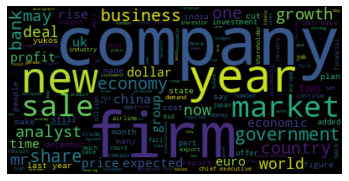

entertainment


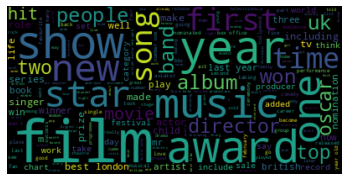

politics


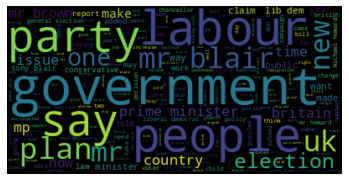

sport


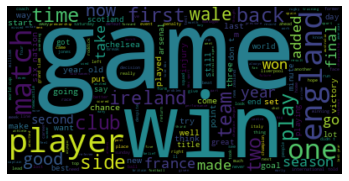

tech


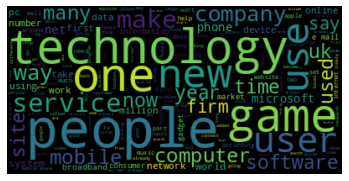

In [27]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

# สร้าง stopword list
stopwords = set(STOPWORDS).union(['wa','said','ha','u','will','tory','s'])
for category in categories:
  print(category)
  # ข้อความในแต่ละ category
  df_wordcloud=df[df['Category']==category]
  # สร้าง list ของข้อความ
  word_list_wordcloud=df_wordcloud['Text_Lemma'].tolist()
  # แปลงจาก list เป็o string
  text_wordcloud = " ".join(word_list_wordcloud)
  # สร้าง word cloud ในแต่ละ category ซึ่งไม่แสดงค่าความถี่ของคำที่เป็น stop word 
  # เช่นคำว่า i ,am 
  wordcloud = WordCloud(stopwords=stopwords).generate(text_wordcloud)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()
  plt.close()

# Define X and y parameters

In [29]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Category_number'] = labelencoder.fit_transform(df['Category'])

แปลงประเภทของข่าวให้กลายเป็นตัวเลขโดยใช้คำสั่ง LabelEncoder ซึ่ง import จาก library sklearn 

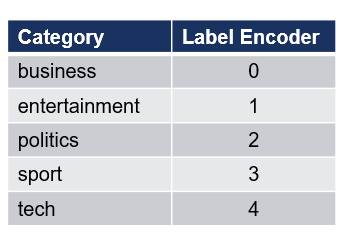

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [30]:
df[['Category','Category_number']].tail()

,Category,Category_number
2220,politics,2
2221,politics,2
2222,politics,2
2223,politics,2
2224,politics,2


In [31]:
X=df[['Text_Lemma']]
y=df[['Category_number']]

# Split Train/Test Dataset

แบ่ง Dataset ออกเป็น train:test dataset ในอัตราส่วน 80:20 ของ Dataset ทั้งหมด ใช้คำสั่ง train_test_split() 

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=39)

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1780, 1), (445, 1), (1780, 1), (445, 1))

In [34]:
# แปลงรูปแบบจาก dataframe เป็น list
X_train_corpus=X_train['Text_Lemma'].tolist()
X_test_corpus=X_test['Text_Lemma'].tolist()

แปลงข้อความของข่าวให้เป็นตัวเลขโดยใช้เทคนิคของ TF-IDF โดยใช้ function TfidfVectorizer() 

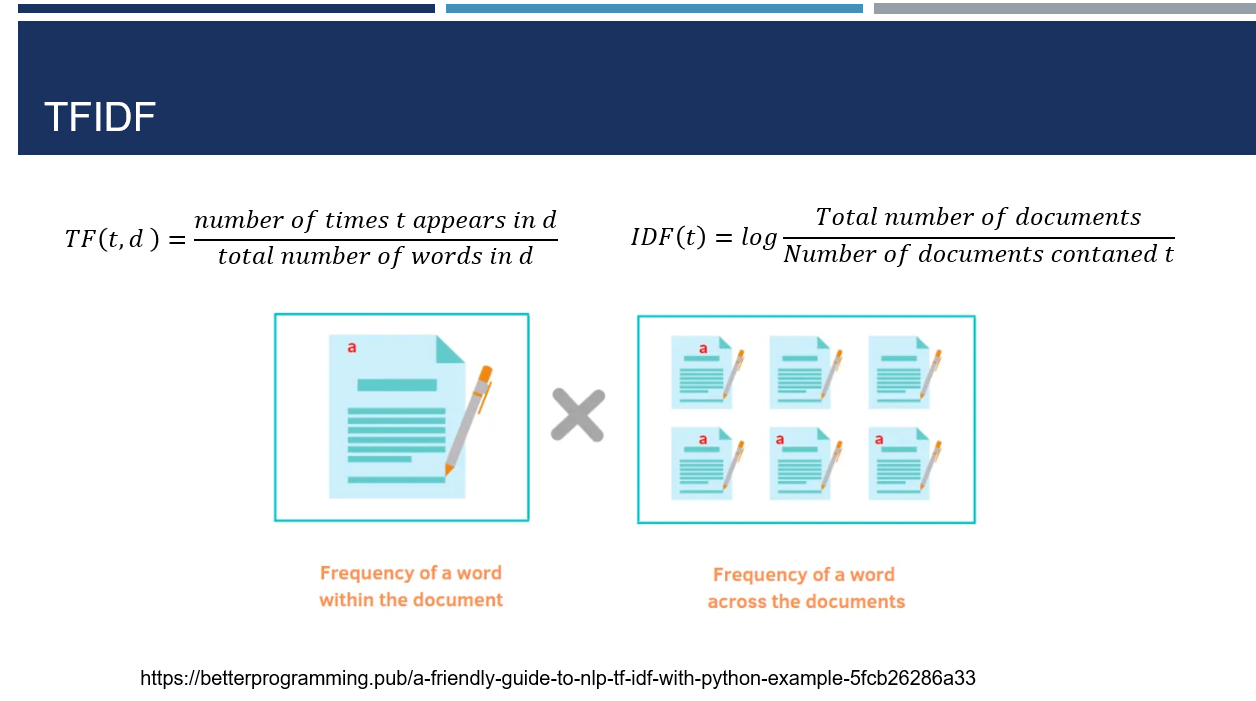

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
# TF-IDF function
tf_idf = TfidfVectorizer(stop_words='english')
# แปลงข้อความใน train corpus ให้กลายเป็นตัวเลขด้วนเทคนิค TF-IDF
X_train_tf = tf_idf.fit_transform(X_train_corpus)

In [36]:
X_train_tf.shape, y_train.shape

((1780, 23934), (1780, 1))

In [38]:
# ค่า TF-IDF ใน train corpus
X_train_tf_value=X_train_tf.toarray()
X_train_tf_value.shape

(1780, 23934)

In [37]:
# คำที่ใช้ในการหาค่า TF-IDF 
word_of_tfidf=tf_idf.get_feature_names_out()
len(word_of_tfidf)

23934

In [39]:
# ค่า TF-IDF ของคำในแต่ละเอกสารใน train dataset
df_tfidf_value=pd.DataFrame(X_train_tf_value,columns=word_of_tfidf)
df_tfidf_value.head()

,00,000,0001,000bn,000m,000s,000th,001,001and,001st,004,007,01,0100,011,0130,02,0200,028,03,0300,033,04,0400,041,04bn,04secs,05,050,050505,0530,0530gmt,056,05bn,06,060,0619,0630,069,06bn,07,070,0700,0710,072,0730,07bn,08,080,0800,081,088,08bn,09,0900,09bn,09secs,10,100,1000,1000m,1000th,100bn,100m,101,102,102m,103,104,104m,105,105bn,105m,106,106cm,106m,107,108,1080,109,109m,10bn,10cm,10ft,10k,10km,10m,10secs,10th,11,110,1100,110m,110th,111,1115,111m,112,113,1130,1130p,113bn,113th,114,115,116,116i,117,117m,117th,118,118m,119,119bn,11bn,11m,11pm,11th,12,120,1200,1200m,120bn,120gb,120m,121,1215,1218,1230,125,125m,126,127,127th,128,129,12a,12bn,12cm,12m,12th,13,130,1300,130cm,130m,131,132,133,1330,133m,134,134m,135,135m,136,136m,137,137m,138m,138p,139,13bn,13m,13secs,13th,14,140,1400,141,141m,142,142bn,142m,143,1430,143m,144,1441,144m,145,145m,146,147,148,149,1497,149bn,14bn,14m,14mbps,14th,15,150,1500,1500m,150m,151,151m,152,152m,153,153m,154m,155,155bn,155m,156,157,157m,158,158th,159,15bn,15m,15mb,15mbps,15th,16,160,1600,1600s,1606,160bn,160gb,160m,161,162,162bn,162m,163,163m,164,1642,165,1650,166,166bn,167,1670,168,1689,168m,169,1695,16bn,16k,16m,16th,17,...,wow,wowed,wpp,wracking,wrangle,wrangling,wrap,wrapped,wrapping,wray,wraz,wreath,wreck,wrecked,wrecking,wrenching,wrested,wrestled,wrexham,wriggled,wright,wringing,wrist,wristwatch,write,writeback,writer,writes,writing,written,wrong,wrongdoing,wrongful,wrongfully,wrongly,wrote,wrought,wru,wry,wsis,wsj,wta,wtih,wto,wttc,wuthering,wwii,www,wyatt,wyman,wyn,wyness,wynne,wyver,x1,x3,x5,x505,x800,xaba,xabi,xavi,xavier,xbox,xboxes,xda,xdance,xdr,xenia,xenon,xenophobia,xenophobic,xerox,xhosa,xiluodu,xing,xinhua,xlr,xp,xp2,xstrata,xuebing,xv,xxx,xzibit,ya,yachvili,yadav,yadavaran,yaffle,yagan,yahoo,yakubu,yamane,yamanouchi,yamarone,yan,yang,yangtze,yann,yannick,yantai,yanukovich,yanukovych,yaounde,yapp,yard,yardley,yarnton,yaron,yaseen,yasser,yates,yauch,yawning,yea,yeading,yeah,yeahronimo,year,yearly,yearned,yearning,yearwood,yeats,yehoshua,yelena,yelling,yellow,yellowstone,yen,yeo,yeob,yeovil,yepp,yes,yesterday,yesteryear,yeun,yh,yiannis,yield,yielded,yili,yimou,yob,yobo,yoda,yodelling,yoffi,yoga,yolande,yonca,yoo,yoran,yore,york,yorker,yorkshire,yoshiaki,yoshifumi,yougov,young,younger,youngest,youngster,youth,youthful,youzhny,yoxall,yuan,yudhoyono,yuganksneftegas,yugansk,yuganskneftegas,yuganskneftegaz,yuganskneftgas,yugoslavia,yugoslavian,yuji,yukon,yukos,yulia,yungmin,yuppy,yuri,yury,yushchenko,yusuf,yvette,zabaleta,zach,zack,zadie,zaidi,zajec,zakuani,zambia,zambian,zanussi,zar,zardari,zatoichi,zdnet,zealand,zealander,zealous,zed,zeeuw,zeh,zeitgeist,zelda,zellweger,zen,zenden,zenith,zephyr,zeppelin,zero,zeta,zhang,zhaoxing,zheng,zib,zidane,ziers,zillion,zimbabwe,zinc,zinedine,zip,ziyi,zodiac,zoe,zoellick,zogbia,zola,zombic,zombie,zone,zonealarm,zoom,zooropa,zorro,zubair,zuluaga,zurich,zutons,zvonareva,zvyagintsev
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.111124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [40]:
X_train[:3]

,Text_Lemma
1949,voucher to cut winter death pensioner are bein...
1419,mobile rack up 20 year of use mobile phone in ...
882,versace art portfolio up for sale the art coll...


In [41]:
df_tfidf_value['vodafone'][1]

0.3819890261785784

In [44]:
X_train['Text_Lemma'][1419]

'mobile rack up 20 year of use mobile phone in the uk are celebrating their 20th anniversary this weekend britain s first mobile phone call wa made across the vodafone network on 1 january 1985 by veteran comedian ernie wise in the 20 year since that day mobile phone have become an integral part of modern life and now almost 90 of briton own a handset mobile have become so popular that many people use their handset a their only phone and rarely use a landline the first ever call over a portable phone wa made in 1973 in new york but it took 10 year for the first commercial mobile service to be launched the uk wa not far behind the rest of the world in setting up network in 1985 that let people make call while they walked the first call wa made from st katherine s dock to vodafone s head office in newbury which at the time wa over a curry house for the first nine day of 1985 vodafone wa the only firm with a mobile network in the uk then on 10 january cellnet now o2 launched it service mi

# Train model 

Train model โดยใช้ MultinomialNB ในการแยกประเภทของข่าว

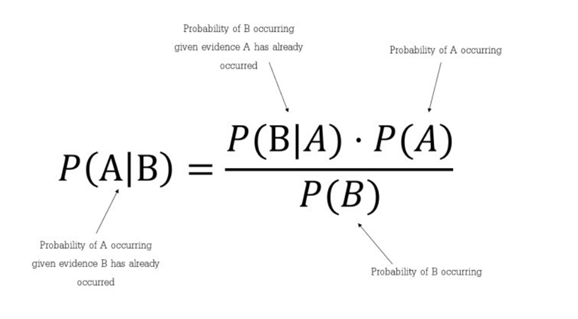

In [45]:
from sklearn.naive_bayes import MultinomialNB
# model MultinomialNB
naive_bayes_classifier = MultinomialNB()
# Train model โดยใช้ค่า TF-IDF ของ train dataset
naive_bayes_classifier.fit(X_train_tf, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [48]:
X_train_tf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02374474, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
y_train

In [50]:
# แปลงข้อความใน test corpus ให้กลายเป็นตัวเลขด้วนเทคนิค TF-IDF
X_test_tf = tf_idf.transform(X_test_corpus)

In [51]:
X_test_tf.shape

(445, 23934)

In [52]:
# Predict ประเภทของข่าวโดยใช้ค่า TF-IDF ของ test dataset
y_pred = naive_bayes_classifier.predict(X_test_tf)

In [53]:
y_pred

array([3, 3, 1, 3, 4, 3, 2, 1, 0, 4, 3, 4, 4, 1, 2, 4, 3, 0, 1, 0, 3, 4,
       4, 1, 0, 1, 3, 4, 0, 3, 3, 4, 1, 2, 4, 2, 0, 4, 1, 4, 1, 1, 3, 4,
       2, 0, 4, 2, 2, 3, 4, 2, 2, 0, 3, 0, 4, 2, 0, 0, 0, 3, 4, 4, 2, 0,
       2, 4, 3, 0, 0, 3, 3, 0, 3, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 3, 3, 0,
       3, 3, 3, 2, 3, 0, 4, 2, 0, 1, 4, 3, 0, 3, 2, 2, 2, 1, 0, 3, 3, 1,
       1, 0, 2, 2, 0, 3, 1, 2, 1, 1, 0, 3, 3, 2, 0, 2, 4, 0, 3, 4, 1, 3,
       4, 2, 0, 3, 3, 3, 2, 0, 3, 3, 2, 2, 4, 0, 3, 0, 0, 4, 4, 2, 4, 2,
       0, 3, 3, 2, 4, 1, 4, 4, 2, 0, 4, 1, 3, 2, 4, 2, 2, 4, 3, 4, 2, 3,
       1, 1, 2, 1, 3, 3, 1, 0, 4, 3, 2, 2, 1, 1, 4, 2, 4, 2, 3, 3, 1, 4,
       2, 2, 2, 1, 3, 0, 4, 2, 3, 1, 2, 3, 2, 0, 4, 4, 2, 3, 0, 2, 3, 3,
       0, 3, 2, 3, 4, 2, 1, 3, 3, 1, 3, 3, 0, 0, 3, 2, 1, 0, 4, 3, 0, 2,
       4, 2, 4, 3, 4, 3, 0, 3, 1, 4, 0, 1, 2, 1, 3, 0, 4, 3, 1, 4, 0, 3,
       0, 3, 1, 4, 4, 2, 2, 4, 1, 1, 3, 4, 4, 4, 0, 0, 0, 2, 2, 3, 2, 0,
       4, 3, 3, 0, 4, 3, 0, 3, 4, 3, 0, 4, 1, 3, 0,

# Confusion Matrix

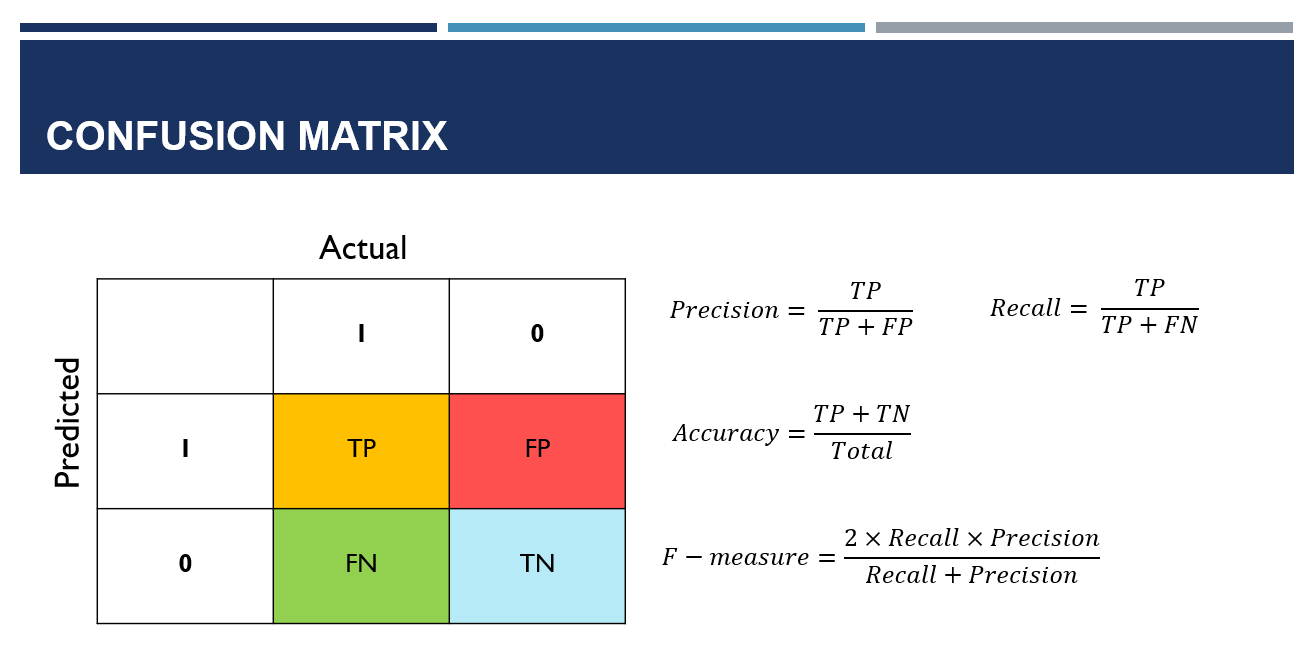

In [54]:
from sklearn import metrics

จากตาราง Confusion matrix ซึ่งใช้คำสั่ง metrics.classification_report() จาก library sklearn พบว่า model predict ประเภทของข่าวมีค่า accuracy สูงถึง 96% เปรียบเทียบระหว่างประเภทข่าวที่ model predict กับประเภทของข่าว

In [55]:
target_names = ['business', 'entertainment', 'politics','sport','tech']
print(metrics.classification_report(y_test, y_pred,target_names=target_names))

               precision    recall  f1-score   support

     business       0.91      0.97      0.94        89
entertainment       0.98      0.94      0.96        64
     politics       0.95      0.96      0.95        92
        sport       0.98      1.00      0.99       103
         tech       0.98      0.93      0.95        97

     accuracy                           0.96       445
    macro avg       0.96      0.96      0.96       445
 weighted avg       0.96      0.96      0.96       445



ทดสอบโดยใช้ข้อความข่าวกีฬาจาก website the guardian ซึ่งมี link ข่าวดังนี้

https://www.theguardian.com/sport/2023/feb/17/ollie-robinson-hopes-worthy-bearer-of-anderson-and-broad-baton-cricket

In [56]:
test_text='''
Ollie Robinson hopes to be ‘worthy bearer’ of Anderson and Broad’s baton
England’s veteran pace bowlers hit 1,001 Test wickets in tandem
‘These guys are the greats of the game,’ says Tom Blundell
Ollie Robinson celebrates snaring the wicket of New Zealand’s Daryl Mitchell
Ollie Robinson celebrates snaring the wicket of New Zealand’s Daryl Mitchell on 
his way to four for 54. Photograph: Phil Walter/Getty Images
Ali Martin at Bay Oval
@Cricket_Ali
Fri 17 Feb 2023 11.50 GMT
Ollie Robinson hopes to become a worthy recipient of the baton when Jimmy 
Anderson and Stuart Broad finally call time on their careers after crediting 
the record-breaking pair for his rapid rise in international cricket.

Robinson once again showed his burgeoning skills away from home on the second 
day of the first Test against New Zealand at Bay Oval, figures of four for 54 
from 19 overs representing the standout among England’s attack and seeing his 
Test bowling average drop back below 20.

skip past newsletter promotion
Sign up to The Spin

Free weekly newsletter
Subscribe to our cricket newsletter for our writers' thoughts on the biggest 
stories and a review of the week’s action


Privacy Notice: Newsletters may contain info about charities, online ads, 
and content funded by outside parties. For more information see our Privacy 
Policy. We use Google reCaptcha to protect our website and the Google Privacy 
Policy and Terms of Service apply.
after newsletter promotion
Tom Blundell hits out during his impressive innings for New Zealand against 
England at Bay Oval.
Tom Blundell’s 138 leads New Zealand fightback but England forge ahead
Read more
Speaking after stumps, and asked about his removal of Daryl Mitchell for 
a 10-ball duck that saw the right-armer shoulder arms, the 29-year-old replied:
 “A big thing for me is my use of the crease, which I’ve learned from Jimmy and 
 Broady. In county cricket you sort of run up and bowl from mid-crease – it’s 
 quite generic – whereas in international cricket, the batters are that much 
 better you have to be more on it: use the crease and use your skills.


“They’ve been very open and honest with me since I’ve come into the environment
 which has been amazing for me and hopefully I can be a worthy bearer of the 
 baton if you like.”

Robinson was not the only player to heap praise on the pair after they drew 
level with Glenn McGrath and Shane Warne’s record 1,001 wickets in Tests played
 together. Tom Blundell, whose sparkling 138 kept New Zealand in the contest, 
 admitted they were a factor in his own efforts with the bat.

CRICKET-NZL-ENG<br>England's Stuart Broad plays a shot during day two of the
first cricket test match between New Zealand and England at Bay Oval in Mount
Maunganui on February 17, 2023. (Photo by Marty MELVILLE / AFP) (Photo by MARTY 
MELVILLE/AFP via Getty Images)
Release the Nighthawk! England’s novel approach to the nightwatchman
Read more
“I’m sort of in awe,” Blundell said. “These guys are the greats of the game and 
they’re bowling at you, which is a cool experience. It’s something that really 
gets me into the fighting mode and takes me to the next level. It’s always nice 
when you’re facing the world’s best.”

Robinson added: “It’s pretty impressive isn’t it? There’s not really words to 
express how impressive it is but just to be on the field with them is a 
privilege for me and I’m enjoying every minute of it.”'''

In [57]:
# แปลงตัวอักษรตัวใหญ่ให้เป็นตัวเล็กทั้งหมด
# ลบ punctuation ทั้งหมด
test_text=Preprocess_cleansing(test_text)
# ตัดคำ
test_text=word_tokenize(test_text)
# แปลงคำตามรูปแบบของไวยากรณ์
test_text=Lemma_text(test_text)
test_text

'ollie robinson hope to be ‘ worthy bearer ’ of anderson and broad ’ s baton england ’ s veteran pace bowler hit 1 001 test wicket in tandem ‘ these guy are the great of the game ’ say tom blundell ollie robinson celebrates snaring the wicket of new zealand ’ s daryl mitchell ollie robinson celebrates snaring the wicket of new zealand ’ s daryl mitchell on his way to four for 54 photograph phil walter getty image ali martin at bay oval cricket ali fri 17 feb 2023 11 50 gmt ollie robinson hope to become a worthy recipient of the baton when jimmy anderson and stuart broad finally call time on their career after crediting the record breaking pair for his rapid rise in international cricket robinson once again showed his burgeoning skill away from home on the second day of the first test against new zealand at bay oval figure of four for 54 from 19 over representing the standout among england ’ s attack and seeing his test bowling average drop back below 20 skip past newsletter promotion s

In [58]:
# แปลงจากข้อความให้เป็นตัวเลข
X_predict=tf_idf.transform([test_text])
# predict ประเภทของข่าวซึ่งคำตอบคือ 3(sport)
naive_bayes_classifier.predict(X_predict)

array([3])

In [64]:
X_predict.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])